# Experiment Report

In [1]:
import os
import numpy as np
np.warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import seaborn as sns
import json
%matplotlib inline

# statistics
from scipy import stats
from itertools import product, combinations

In [2]:
# experiments = ['DQN_Malmo_Seq-MinecraftBasicNew-v0-20181015-162056-87.json',
#  'DQN_Malmo_Seq-MinecraftBasicNew-v0-20181015-233622-37.json',
#  'DQN_Malmo_Seq-MinecraftBasicNew-v0-20181018-095954-70.json']

In [13]:
root = "/Users/lucasosouza/Documents/fasterRLdata"
results_path = "/results/masters2/"
experiments = [f for f in os.listdir(root+results_path) if f[-4:] == 'json']
results = {}
for exp in experiments:
    exp_name = exp[:-5]
    try:
        with open( root+ results_path + exp, 'r') as f:
            results[exp_name] = json.load(f)
    except:
        pass


In [16]:
experiments

['dqn_sharing.json',
 'dqn_prio_sharing.json',
 'dqn_prio_focus_sharing.json',
 'dqn_focus_sharing.json',
 'dqn.json',
 'dqn_prio.json']

In [9]:
# results
experiments[0][:-5]

'dqn_sharing'

In [24]:
episode_count = {}
for exp in experiments:
    exp_name = exp[:-5]
    episode_count[exp_name] = results[exp_name]['episodes_to_complete']

In [241]:
for key, data in episode_count.items():
    print("{}: {}".format(key, sorted(data).count(1000)))

dqn_sharing: 0
dqn_prio_sharing: 29
dqn_prio_focus_sharing: 0
dqn_focus_sharing: 0
dqn: 1
dqn_prio: 2


In [67]:
episode_count

{'dqn_sharing': [194,
  510,
  126,
  118,
  304,
  464,
  375,
  395,
  330,
  392,
  468,
  180,
  319,
  338,
  679,
  546,
  287,
  221,
  502,
  521,
  110,
  264,
  447,
  438,
  190,
  213,
  391,
  145,
  393,
  185,
  551,
  630,
  616,
  380,
  178,
  186,
  510,
  418,
  277,
  280,
  187,
  221,
  256,
  478,
  145,
  699,
  125,
  131,
  413,
  415,
  811,
  573,
  585,
  156,
  288,
  116,
  433,
  520,
  222,
  455,
  121,
  433,
  137,
  324,
  471,
  582,
  485,
  241,
  250,
  326,
  178,
  233,
  192,
  175,
  161,
  172,
  496,
  553,
  167,
  197,
  447,
  307,
  430,
  214,
  285,
  328,
  168,
  649,
  171,
  207,
  129,
  172,
  146,
  160,
  361,
  226,
  332,
  387,
  106,
  128],
 'dqn_prio_sharing': [495,
  216,
  1000,
  131,
  1000,
  1000,
  132,
  194,
  696,
  308,
  1000,
  89,
  229,
  114,
  94,
  101,
  107,
  1000,
  310,
  151,
  110,
  688,
  134,
  158,
  1000,
  221,
  1000,
  1000,
  163,
  372,
  153,
  364,
  829,
  131,
  1000,
  237,
  240

In [28]:
experiments

['dqn_sharing.json',
 'dqn_prio_sharing.json',
 'dqn_prio_focus_sharing.json',
 'dqn_focus_sharing.json',
 'dqn.json',
 'dqn_prio.json']

In [29]:
print("means")
for k,v in episode_count.items():
    print(np.mean(v))

print("\ndeviations")
for k,v in episode_count.items():
    print(np.std(v))


means
325.47
483.92
184.42
161.0
310.84
293.14

deviations
163.71331375303598
380.47808557129804
138.53195876764323
134.54716645102565
175.3036063519516
250.54624403490863


In [32]:
steps_count = {}
for exp in experiments:
    exp_name = exp[:-5]
    steps_count[exp_name] = results[exp_name]['average_steps']

In [34]:
## NUM STEPS
print("means")
for k,v in steps_count.items():
    print(np.mean(v))

print("\ndeviations")
for k,v in steps_count.items():
    print(np.std(v))

    

means
101.54746102417778
77.15314790176873
57.516509693156564
74.94435593214801
105.96435031993241
98.93276803994753

deviations
27.776938713316177
31.941427274209268
27.919573764094768
32.238309284588865
30.701058081348396
36.76456062779427


In [68]:
rewards_count = {}
for exp in experiments:
    exp_name = exp[:-5]
    rewards_count[exp_name] = results[exp_name]['average_rewards']

In [38]:
## NUM STEPS
print("means")
for k,v in rewards_count.items():
    print(np.mean(v))

print("\ndeviations")
for k,v in rewards_count.items():
    print(np.std(v))

    

means
101.54746102417778
77.15314790176873
57.516509693156564
74.94435593214801
105.96435031993241
98.93276803994753

deviations
27.776938713316177
31.941427274209268
27.919573764094768
32.238309284588865
30.701058081348396
36.76456062779427


In [39]:
experiments

['dqn_sharing.json',
 'dqn_prio_sharing.json',
 'dqn_prio_focus_sharing.json',
 'dqn_focus_sharing.json',
 'dqn.json',
 'dqn_prio.json']

In [70]:
results.keys()

dict_keys(['dqn_sharing', 'dqn_prio_sharing', 'dqn_prio_focus_sharing', 'dqn_focus_sharing', 'dqn', 'dqn_prio'])

In [205]:
experiments_labels = {
    'dqn_sharing': 'DQN + Regular ES',
    'dqn_prio_sharing': 'DQN + Prioritized ES', 
    'dqn_prio_focus_sharing': 'DQN + Prioritized Focused ES', 
    'dqn_focus_sharing': 'DQN + Focused ES', 
    'dqn': 'DQN',
    'dqn_prio': 'DQN w/ Priority Replay',
}

In [134]:
def plot(results, selected_experiments, colors):
    plt.figure(figsize=(10,4))
    # plt.xticks(np.arange(0,300000,50000))
    plt.xgrid(True)
    for exp_id, color in zip(selected_experiments, colors):
        # exp_label = experiments[exp_name]
        sns.distplot(results[exp_id], label=experiments_labels[exp_id], color=color)
        
    plt.legend()
    plt.xlabel("Number of episodes")
    plt.xlim((0,1000))

    # plt.ylim(0, 0.06)
        


In [73]:
colors = ['#003FFF', '#03ED3A', '#E8000B']

In [98]:
# dir(plt.rcParams)

In [127]:
# format plots
import matplotlib
matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({"axes.grid": True, "grid.linewidth": 0.5})
# plt.tick_params(axis='both', which='major', labelsize=10)
# plot.tick_params(axis='both', which='minor', labelsize=8)


In [140]:
matplotlib.__version__

'2.2.2'

/Users/lucasosouza/anaconda/envs/rl/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


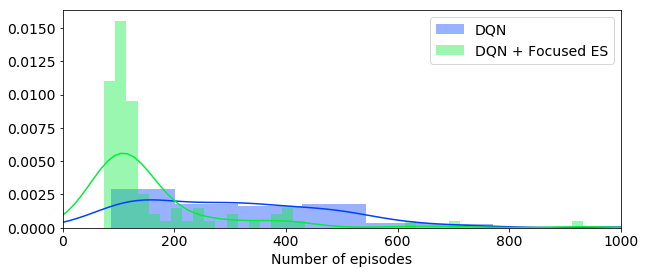

In [142]:
selected_experiments = ['dqn', 'dqn_focus_sharing']
plot(episode_count, selected_experiments, ['#003FFF', '#03ED3A'])
# plt.ylim((0, 0.016))
plt.savefig('+'.join(selected_experiments) + '.png', dpi=300, bbox_inches='tight')

/Users/lucasosouza/anaconda/envs/rl/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


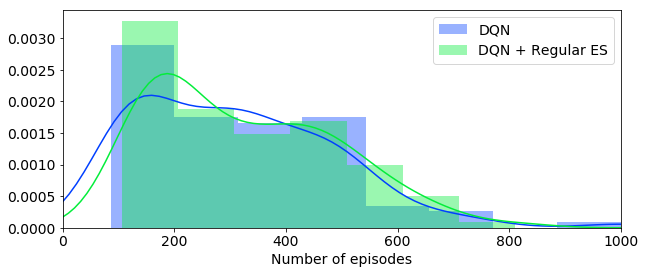

In [143]:
selected_experiments = ['dqn', 'dqn_sharing']
plot(episode_count, selected_experiments, ['#003FFF', '#03ED3A'])
plt.savefig('+'.join(selected_experiments) + '.png', dpi=300, bbox_inches='tight')

/Users/lucasosouza/anaconda/envs/rl/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


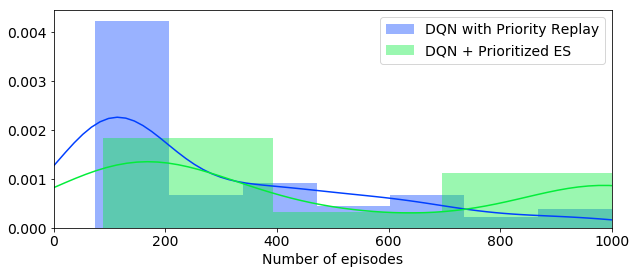

In [144]:
selected_experiments = ['dqn_prio', 'dqn_prio_sharing']
plot(episode_count, selected_experiments, ['#003FFF', '#03ED3A'])
plt.savefig('+'.join(selected_experiments) + '.png', dpi=300, bbox_inches='tight')

/Users/lucasosouza/anaconda/envs/rl/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


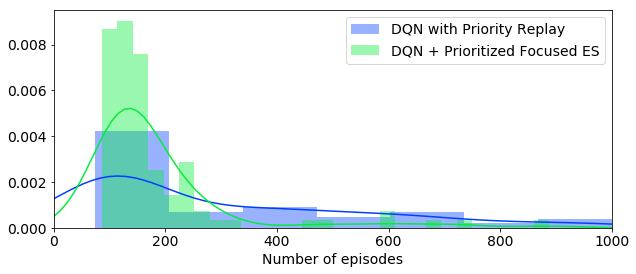

In [145]:
selected_experiments = ['dqn_prio', 'dqn_prio_focus_sharing']
plot(episode_count, selected_experiments, ['#003FFF', '#03ED3A'])
plt.savefig('+'.join(selected_experiments) + '.png', dpi=300, bbox_inches='tight')

/Users/lucasosouza/anaconda/envs/rl/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


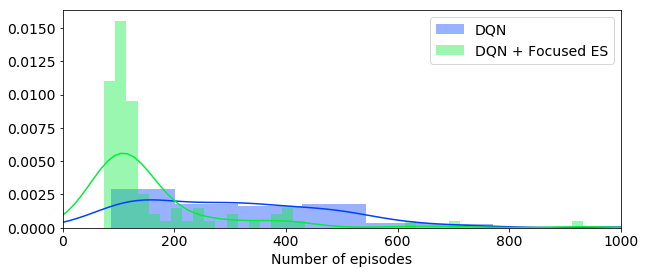

In [135]:
plot(episode_count, ['dqn', 'dqn_focus_sharing'], ['#003FFF', '#03ED3A'])
plt.savefig('res1.png', dpi=300)

In [207]:
plt.rcParams.update({"axes.grid": True, "grid.linewidth": 0.75})

def plot_multi(results, combinations, colors):
    # https://matplotlib.org/examples/pylab_examples/subplots_demo.html
    
    f, axes = plt.subplots(len(combinations), 1, sharex=True, figsize=(10,10))
    f.subplots_adjust(hspace=0.1)

    for idx, comb in enumerate(combinations):
        for exp_id, color in zip(comb, colors):
            sns.distplot(results[exp_id], label=experiments_labels[exp_id], color=color, ax=axes[idx], kde=True)

            axes[idx].xaxis.grid(True)
            axes[idx].yaxis.grid(False)
            axes[idx].legend()
        axes[idx].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))            

    plt.xlabel("Number of episodes")
    plt.xlim((0,1000));

In [238]:
def plot_single(results, selected_experiments, colors):
    plt.figure(figsize=(10,5))
    # plt.xticks(np.arange(0,300000,50000))
    plt.grid(axis='y')
    for exp_id, color in zip(selected_experiments, colors):
        # exp_label = experiments[exp_name]
        sns.distplot(results[exp_id], label=experiments_labels[exp_id], color=color)
        
    plt.legend()
    plt.xlabel("Number of episodes")
    plt.xlim((0,1000))

    # plt.ylim(0, 0.06)
        


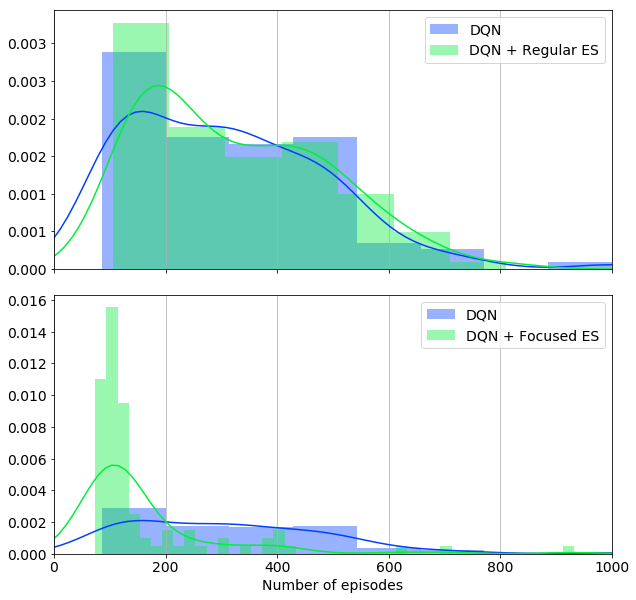

In [235]:
plot_multi(episode_count, (['dqn', 'dqn_sharing'], ['dqn', 'dqn_focus_sharing']), ['#003FFF', '#03ED3A'])
plt.savefig('singleVSmulti.png', dpi=200, bbox_inches='tight')

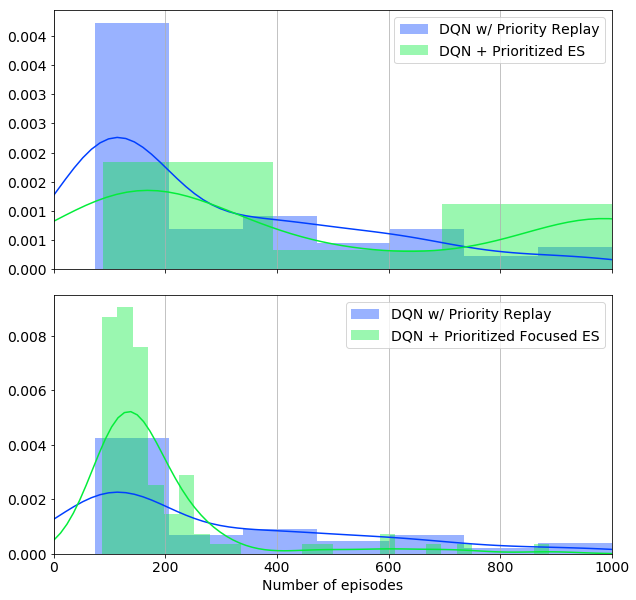

In [236]:
plot_multi(episode_count, (['dqn_prio', 'dqn_prio_sharing'], ['dqn_prio', 'dqn_prio_focus_sharing']), ['#003FFF', '#03ED3A'])
plt.savefig('singleVSmulti-prio.png', dpi=200, bbox_inches='tight')

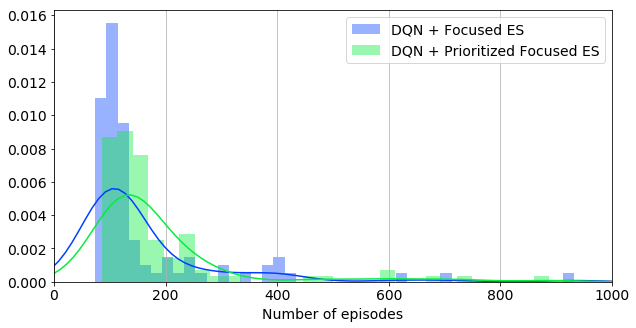

In [239]:
plot_single(episode_count, ['dqn_focus_sharing', 'dqn_prio_focus_sharing'], ['#003FFF', '#03ED3A'])
plt.savefig('multiComparison.png', dpi=200, bbox_inches='tight')

In [237]:
# plot_multi(episode_count, (['dqn_sharing', 'dqn_prio_sharing'], ['dqn_sharing', 'dqn_prio_sharing'], ['dqn_sharing', 'dqn_focus_sharing'], ['dqn_sharing', 'dqn_prio_focus_sharing']), ['#003FFF', '#03ED3A'])
# plt.savefig('allmulti.png', dpi=200, bbox_inches='tight')

/Users/lucasosouza/anaconda/envs/rl/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


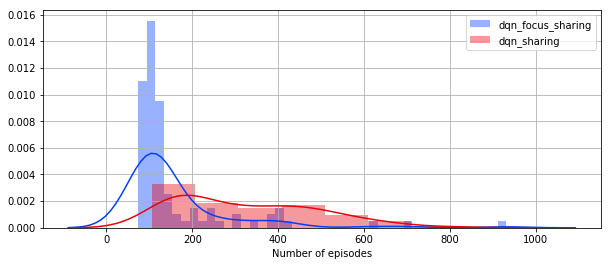

In [45]:
plot(episode_count, ['dqn_focus_sharing', 'dqn_sharing'], ['#003FFF', '#E8000B'])
plt.savefig('res2.png', dpi=300)

/Users/lucasosouza/anaconda/envs/rl/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


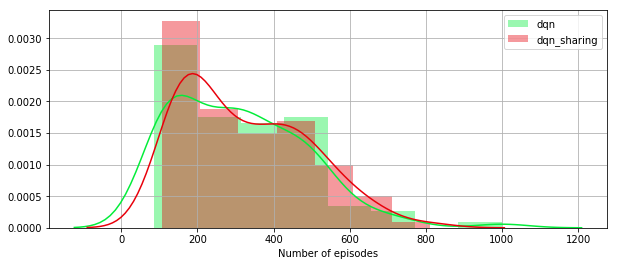

In [47]:
plot(episode_count, ['dqn', 'dqn_sharing'], ['#03ED3A', '#E8000B'])
plt.savefig('res3.png', dpi=300)

In [82]:
# compare 3 in number of episodes, steps, and rewards

In [281]:
# graph['Number of Steps - Mean'] = []
# for k,v in steps_count.items():
#     graph['Number of Steps - Mean'].append(np.mean(v))

# graph['Number of Steps - Std Deviation'] = []
# for k,v in steps_count.items():
#     graph['Number of Steps - Std Deviation'].append(np.std(v))

    

In [282]:
# graph['Episode Total Reward - Mean'] = []
# for k,v in rewards_count.items():
#     graph['Episode Total Reward - Mean'].append(np.mean(v))

# graph['Episode Total Reward - Std Deviation'] = []
# for k,v in rewards_count.items():
#     graph['Episode Total Reward - Std Deviation'].append(np.std(v))


In [314]:
graph = {}

In [315]:
graph['NE Mean'] = []
for k,v in episode_count.items():
    graph['NE Mean'].append(np.mean(v))

graph['NE Deviation'] = []
for k,v in episode_count.items():
    graph['NE Deviation'].append(np.std(v))

In [316]:
graph['Trials Failed'] = []
for k,v in episode_count.items():
    graph['Trials Failed'].append(sorted(v).count(1000))
    

In [317]:
experiments_labels.values()

dict_values(['DQN + Regular ES', 'DQN + Prioritized ES', 'DQN + Prioritized Focused ES', 'DQN + Focused ES', 'DQN', 'DQN w/ Priority Replay'])

In [318]:
pd.set_option("display.colheader_justify","left")
df = pd.DataFrame.from_dict(graph)
df = df.transpose()
df.columns=experiments_labels.values()
df = df.transpose()
df['NE Mean'] = df['NE Mean'].round(decimals=2)
df['NE Deviation'] = df['NE Deviation'].round(decimals=2)
df['Trials Failed'] = pd.to_numeric(df['Trials Failed'], downcast='integer')
df.style.set_properties(**{'text-align': 'center'})
df = df.sort_values(by='NE Mean')
df.head(10)


,NE Mean,NE Deviation,Trials Failed
DQN + Focused ES,161.00,134.55,0
DQN + Prioritized Focused ES,184.42,138.53,0
DQN w/ Priority Replay,293.14,250.55,2
DQN,310.84,175.30,1
DQN + Regular ES,325.47,163.71,0
DQN + Prioritized ES,483.92,380.48,29


In [319]:
print(df.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  NE Mean &  NE Deviation &  Trials Failed \\
\midrule
DQN + Focused ES             &  161.00  &  134.55       &   0            \\
DQN + Prioritized Focused ES &  184.42  &  138.53       &   0            \\
DQN w/ Priority Replay       &  293.14  &  250.55       &   2            \\
DQN                          &  310.84  &  175.30       &   1            \\
DQN + Regular ES             &  325.47  &  163.71       &   0            \\
DQN + Prioritized ES         &  483.92  &  380.48       &  29            \\
\bottomrule
\end{tabular}



In [ ]:
# add number of episodes failed

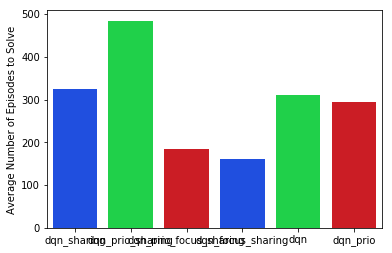

In [61]:
colors = ['#003FFF', '#03ED3A', '#E8000B']
sns.barplot(x=df.columns, y=df.loc['Number of Episodes - Mean'], palette=colors)
# plt.grid(which='major', axis='y')
plt.ylabel("Average Number of Episodes to Solve")
plt.savefig('res4.png', dpi=300)


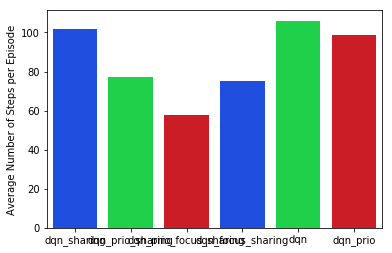

In [62]:
sns.barplot(x=df.columns, y=df.loc['Number of Steps - Mean'], palette=colors)
plt.ylabel("Average Number of Steps per Episode")
plt.savefig('res5.png', dpi=300)


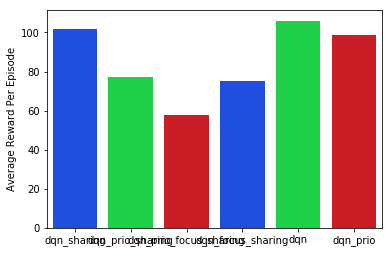

In [63]:
sns.barplot(x=df.columns, y=df.loc['Episode Total Reward - Mean'], palette=colors)
plt.ylabel("Average Reward Per Episode")
plt.savefig('res6.png', dpi=300)



In [65]:
def calc_stats(res):
    # get specific variable to compare
    all_values = list(res.items())
    samples = list(combinations(all_values, 2))
    for sample in samples:
        print(sample[0][0], "vs ",  sample[1][0])
        print("\n")
        print(stats.ks_2samp(sample[0][1], sample[1][1]))  
        print("\n")

calc_stats(episode_count)

dqn_sharing vs  dqn_prio_sharing


Ks_2sampResult(statistic=0.33999999999999997, pvalue=1.2196949831581915e-05)


dqn_sharing vs  dqn_prio_focus_sharing


Ks_2sampResult(statistic=0.52, pvalue=1.2680582326676542e-12)


dqn_sharing vs  dqn_focus_sharing


Ks_2sampResult(statistic=0.64, pvalue=6.664255323564353e-19)


dqn_sharing vs  dqn


Ks_2sampResult(statistic=0.14, pvalue=0.26055273160812736)


dqn_sharing vs  dqn_prio


Ks_2sampResult(statistic=0.41000000000000003, pvalue=5.2233332607580044e-08)


dqn_prio_sharing vs  dqn_prio_focus_sharing


Ks_2sampResult(statistic=0.42000000000000004, pvalue=2.2056176563845562e-08)


dqn_prio_sharing vs  dqn_focus_sharing


Ks_2sampResult(statistic=0.49000000000000005, pvalue=2.9511320832849446e-11)


dqn_prio_sharing vs  dqn


Ks_2sampResult(statistic=0.32999999999999996, pvalue=2.4461995100569117e-05)


dqn_prio_sharing vs  dqn_prio


Ks_2sampResult(statistic=0.29000000000000004, pvalue=0.00032153876440515545)


dqn_prio_focus_sharing vs  dqn_